In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_image = np.zeros(shape=(600,600))
    cv2.putText(blank_image,text='ABCDE',org=(50,300),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=5,color=(255,0,0),thickness=25)
    return blank_image

In [3]:
def display_img(image):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(image,cmap='gray')

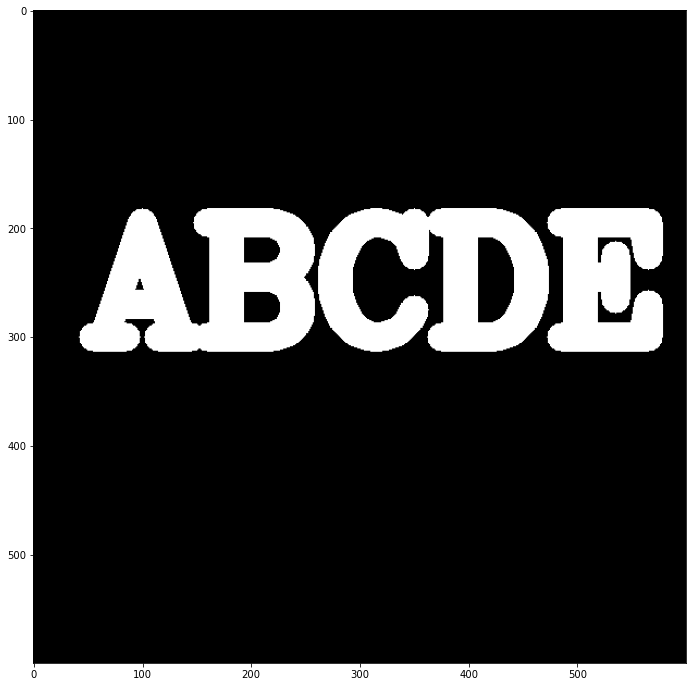

In [4]:
img = load_img()
display_img(img);

In [5]:
kernel = np.ones((5,5),dtype=np.float32)
kernel

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

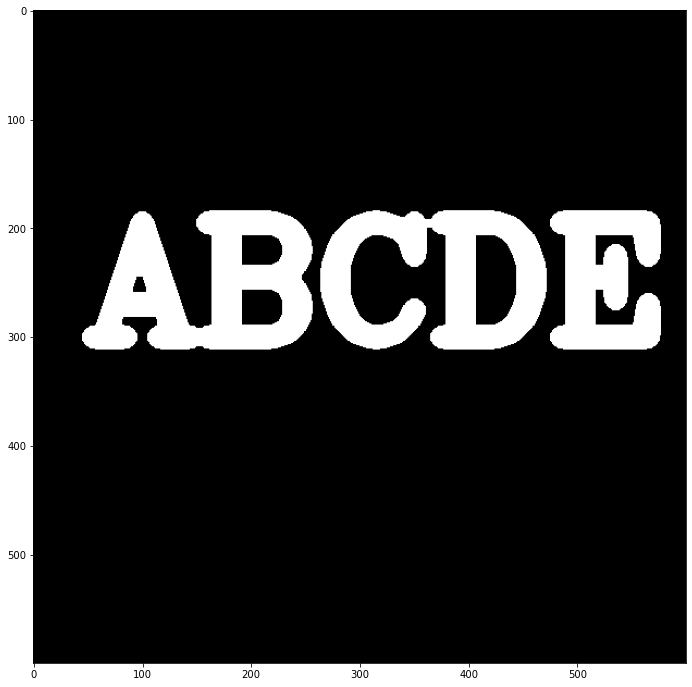

In [6]:
eroded_img = cv2.erode(img,kernel,iterations=1)
display_img(eroded_img);

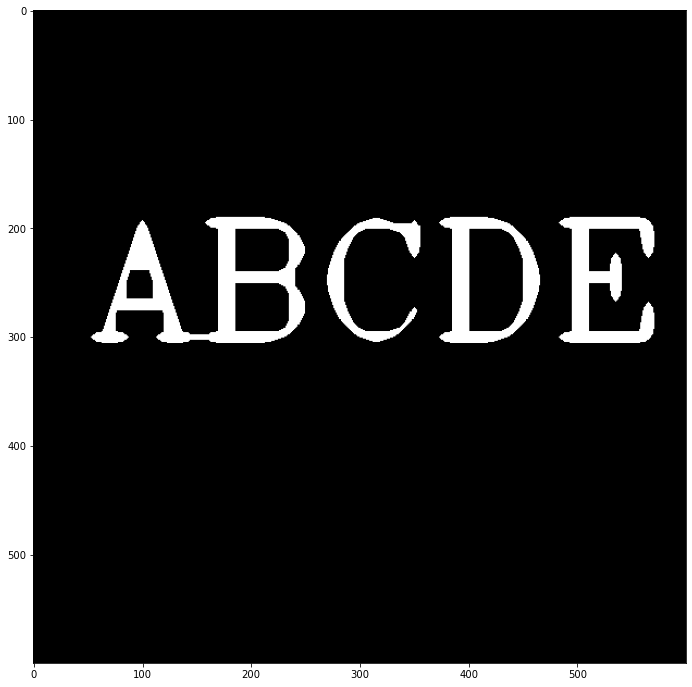

In [7]:
eroded_img = cv2.erode(img,kernel,iterations=4)
display_img(eroded_img);

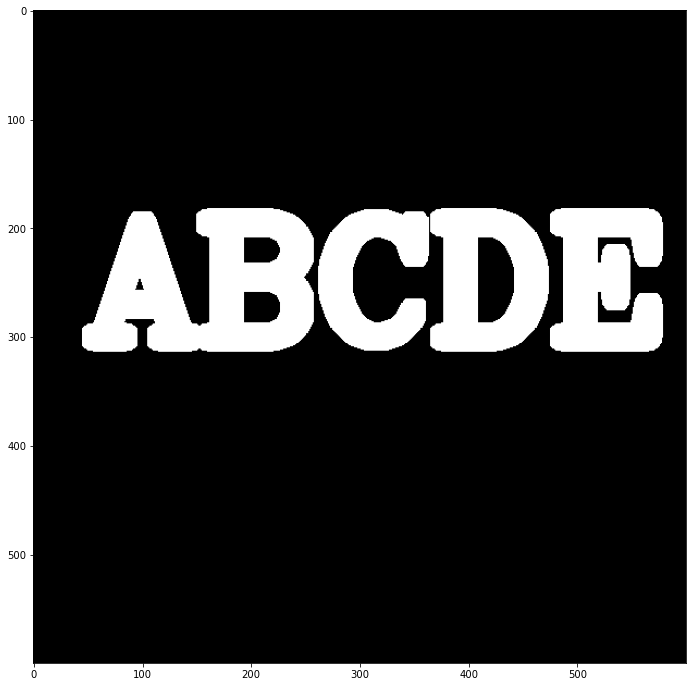

In [8]:
dilated_img = cv2.dilate(eroded_img,kernel,iterations=4)
display_img(dilated_img);

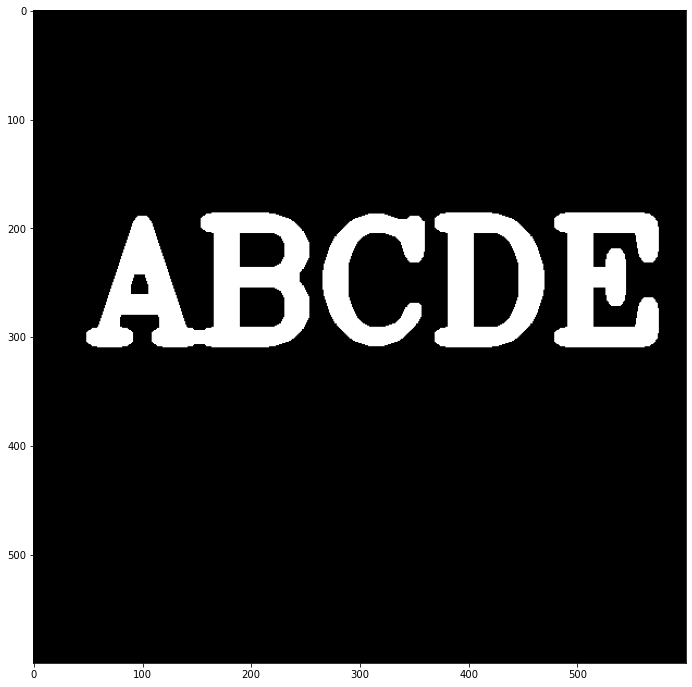

In [9]:
dilated_img = cv2.dilate(eroded_img,kernel,iterations=2)
display_img(dilated_img);

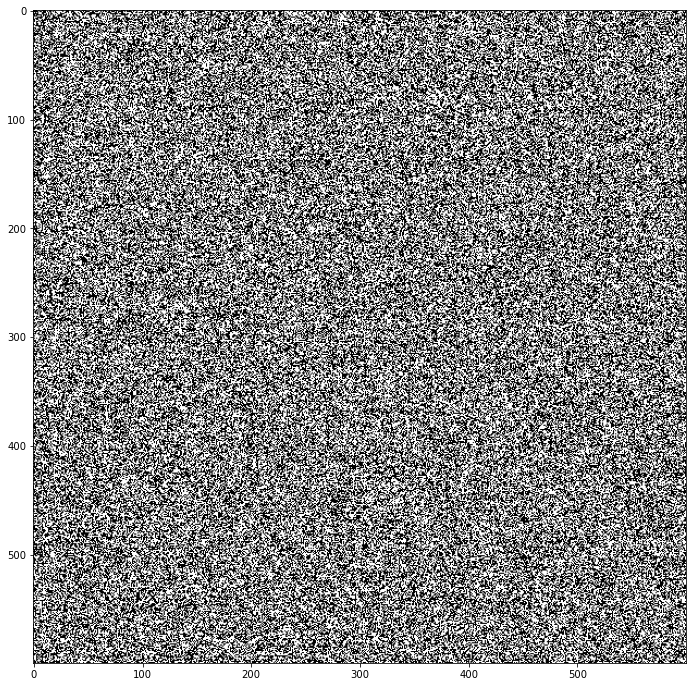

In [10]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))
display_img(white_noise);

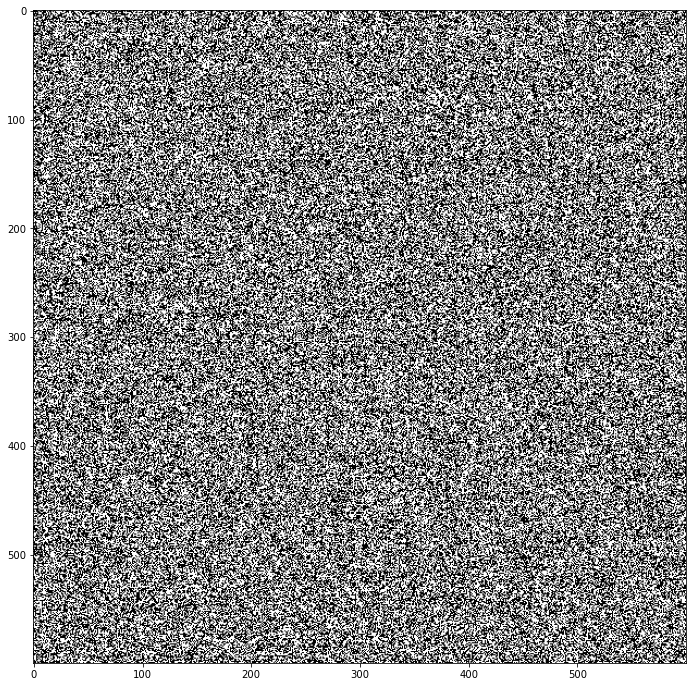

In [11]:
white_noise = white_noise * 255
display_img(white_noise);

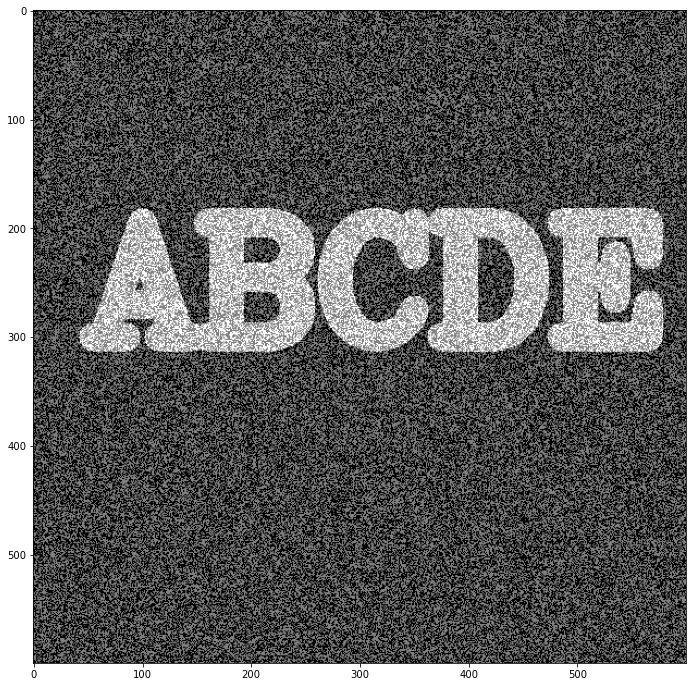

In [12]:
white_noise_img = img + white_noise
display_img(white_noise_img);

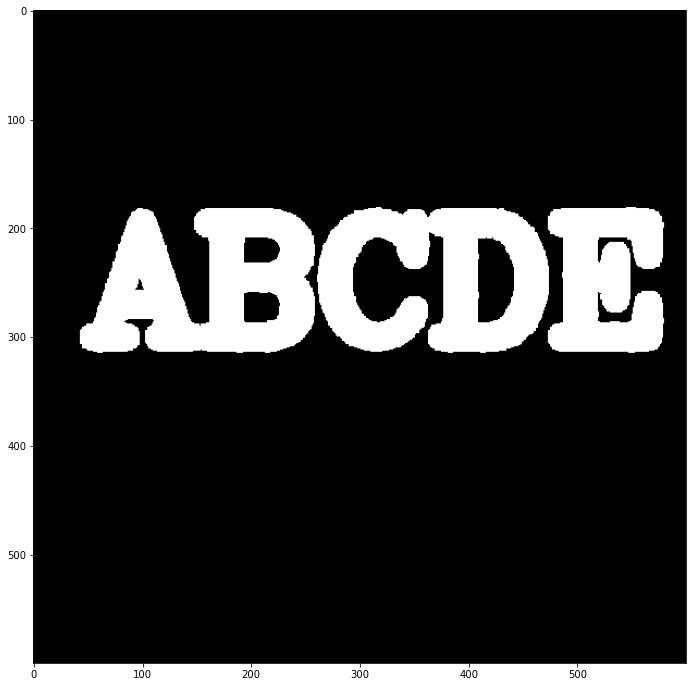

In [13]:
noise_proof_img = cv2.morphologyEx(white_noise_img,cv2.MORPH_OPEN,kernel)
display_img(noise_proof_img);

In [14]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[1, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 0]])

In [15]:
black_noise = black_noise * -255
black_noise

array([[-255,    0, -255, ...,    0,    0, -255],
       [   0,    0,    0, ..., -255,    0,    0],
       [-255, -255,    0, ...,    0, -255, -255],
       ...,
       [-255, -255, -255, ...,    0,    0,    0],
       [-255, -255,    0, ...,    0, -255,    0],
       [-255,    0, -255, ...,    0,    0,    0]])

In [16]:
black_noise_img = img + black_noise
black_noise_img

array([[-255.,    0., -255., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ..., -255.,    0.,    0.],
       [-255., -255.,    0., ...,    0., -255., -255.],
       ...,
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255.,    0., ...,    0., -255.,    0.],
       [-255.,    0., -255., ...,    0.,    0.,    0.]])

In [17]:
black_noise_img[black_noise_img==-255] = 0

In [18]:
np.unique(black_noise_img)

array([  0., 255.])

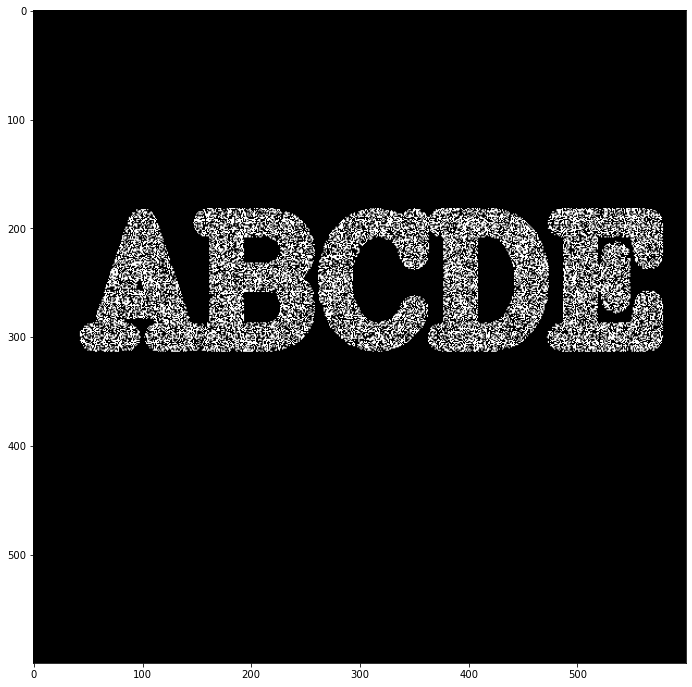

In [19]:
display_img(black_noise_img);

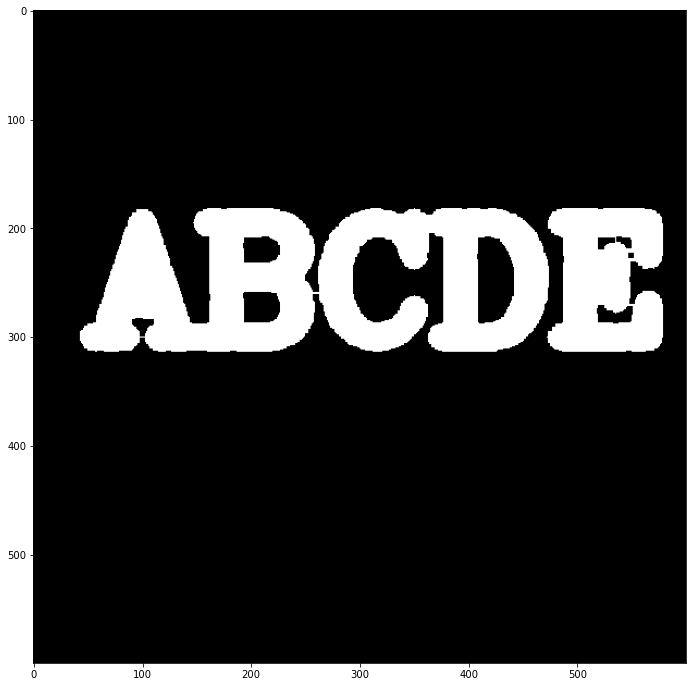

In [27]:
# CLOSING IS A GOOD WAY FOR ELIMINATING FOREGROUND NOISE
noise_proof_img = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(noise_proof_img);

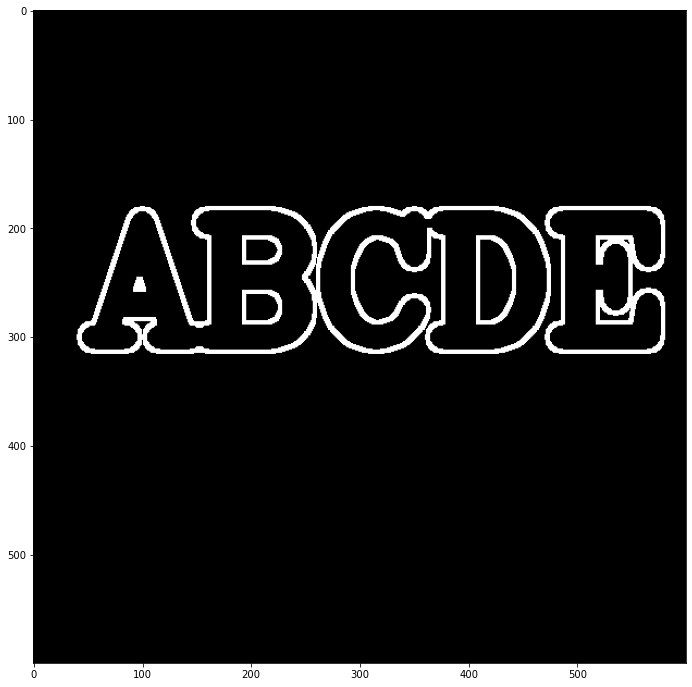

In [28]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient);

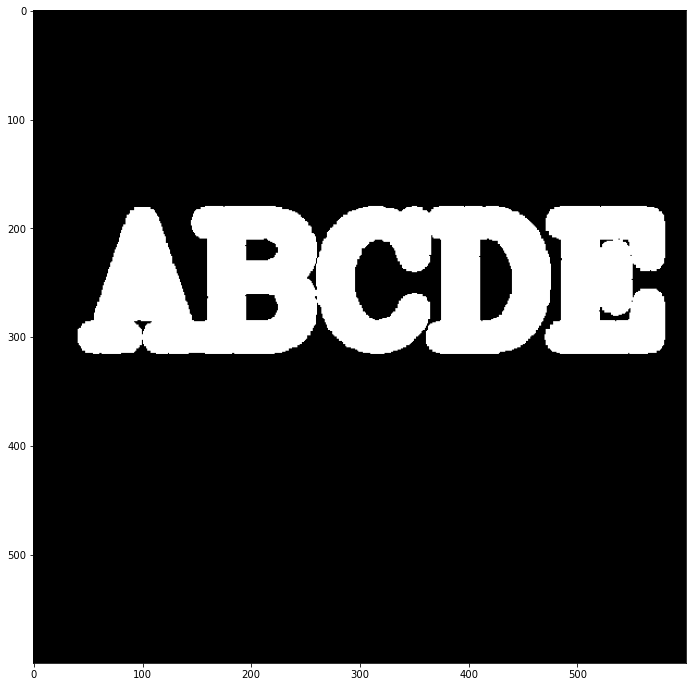

In [37]:
cross = cv2.morphologyEx(black_noise_img,cv2.MORPH_CROSS,kernel)
display_img(cross);

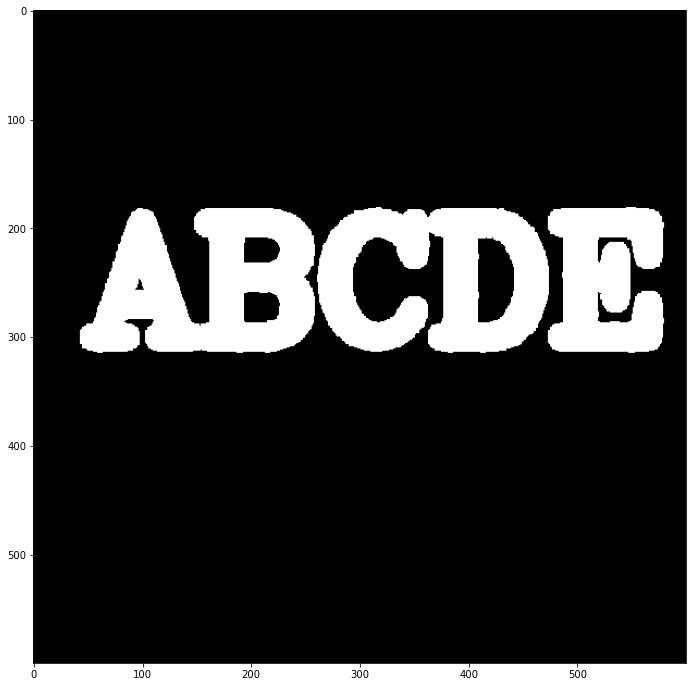

In [34]:
ellipsed_img = cv2.morphologyEx(white_noise_img,cv2.MORPH_ELLIPSE,kernel)
display_img(ellipsed_img);

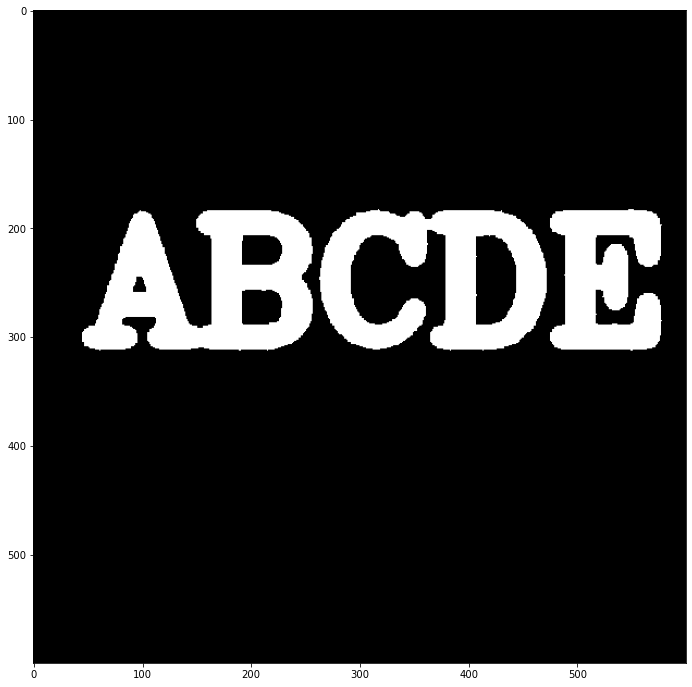

In [40]:
rect = cv2.morphologyEx(white_noise_img,cv2.MORPH_RECT,kernel)
display_img(rect);